In [220]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [221]:
df = pd.read_csv("Instagram data.csv",encoding = 'latin1')
df.head(3)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...


In [222]:
# df.info()
# df.isnulll().sum()

In [223]:
# Calculate summary statistics
summary_stats = df.describe()

# # Transpose the DataFrame for better visualization

summary_stats = summary_stats.transpose()    # Rows become columns and columns become rows.
summary_stats

,count,mean,std,min,25%,50%,75%,max
Impressions,119.0,5703.991597,4843.780105,1941.0,3467.0,4289.0,6138.0,36919.0
From Home,119.0,2475.789916,1489.386348,1133.0,1945.0,2207.0,2602.5,13473.0
From Hashtags,119.0,1887.512605,1884.361443,116.0,726.0,1278.0,2363.5,11817.0
From Explore,119.0,1078.100840,2613.026132,0.0,157.5,326.0,689.5,17414.0
From Other,119.0,171.092437,289.431031,9.0,38.0,74.0,196.0,2547.0
Saves,119.0,153.310924,156.317731,22.0,65.0,109.0,169.0,1095.0
Comments,119.0,6.663866,3.544576,0.0,4.0,6.0,8.0,19.0
Shares,119.0,9.361345,10.089205,0.0,3.0,6.0,13.5,75.0
Likes,119.0,173.781513,82.378947,72.0,121.5,151.0,204.0,549.0
Profile Visits,119.0,50.621849,87.088402,4.0,15.0,23.0,42.0,611.0


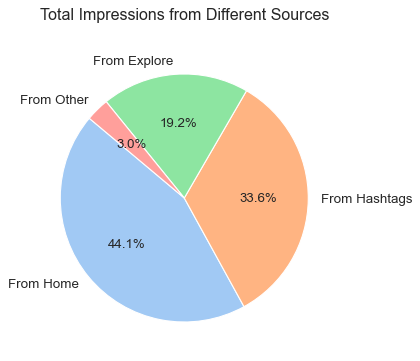

In [224]:
# Selecting and summing the columns of interest

impressions_sources = df[['From Home', 'From Hashtags', 'From Explore', 'From Other']]
impressions_sources_sum = impressions_sources.sum()


plt.figure(figsize=(5, 5))
colors = sns.color_palette("pastel")

plt.pie(impressions_sources_sum.values, labels=impressions_sources_sum.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Total Impressions from Different Sources\n')

plt.show()

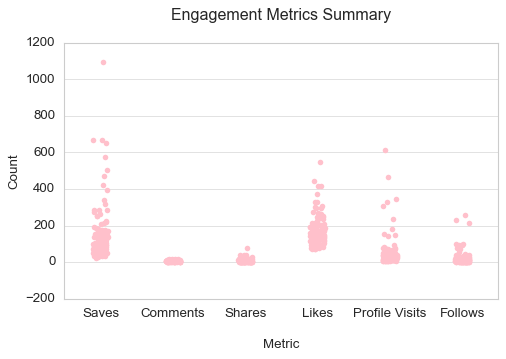

In [225]:
# Selecting engagement metrics

engagement_metrics = df[['Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits', 'Follows']]



# Melt the DataFrame to create a long format suitable for strip plot

engagement_metrics_melted = engagement_metrics.melt(var_name='Metric', value_name='Count')



# Plotting a strip plot with reduced marker size

plt.figure(figsize=(7, 4))
sns.set_style('whitegrid')  # Set plot style
sns.stripplot(x='Metric', y='Count', data = engagement_metrics_melted, color='pink', size=5, jitter=True)
plt.title('Engagement Metrics Summary''\n')
plt.xlabel('\n''Metric')
plt.ylabel('Count')

plt.show()

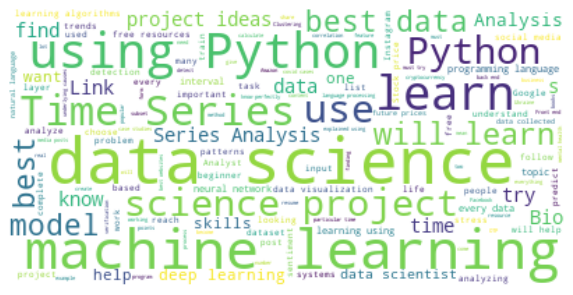

In [226]:
# World Cloud of Captions


# A word cloud is a visual representation of text data where the size of each word indicates its frequency or importance.
# Words that appear more frequently in the text data appear larger in the word cloud.

text = " ".join(i for i in df.Caption)

wordcloud = WordCloud (stopwords=stopwords, background_color = "white").generate(text)


plt.figure(figsize=(9,8))
plt.imshow (wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

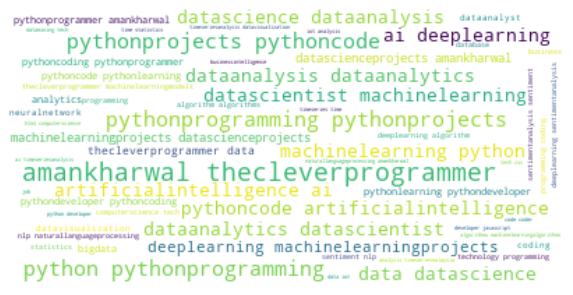

In [227]:
# World Cloud of Hashtags


text = " ".join(i for i in df.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(9,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()


In [228]:
# Conversation rate means how many followers you are getting from the number of profile visits from a post. 


conversion_rate = (df["Follows"].sum() / df["Profile Visits"].sum()) * 100


figure = px.scatter(data_frame = df, x="Profile Visits",
                    y = "Follows", size="Follows", trendline="ols", 
                    title = "Relationship Between Profile Visitors and Followers Gained")


figure.show()


# The relationship between profile visits and followers gained is linear.

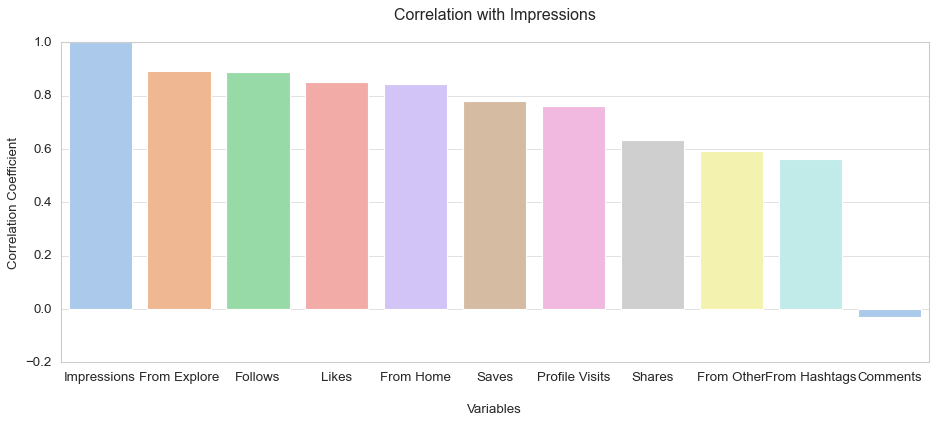

In [229]:
# Exclude non-numeric columns
numeric_data = df.select_dtypes(include=['int64'])

# Calculate correlation
correlation = numeric_data.corr()

# Sort correlations with 'Impressions' in descending order
sorted_correlation = correlation["Impressions"].sort_values(ascending=False)



# Plotting the correlation values
plt.figure(figsize=(14, 5))
sns.barplot(x=sorted_correlation.index, y=sorted_correlation.values, palette='pastel')
plt.title('Correlation with Impressions''\n')
plt.xlabel('\n''Variables')
plt.ylabel('Correlation Coefficient')

plt.show()



# It visualizes these correlations using a bar plot, 
# making it easy to see which variables have the strongest positive or negative relationships with "Impressions".

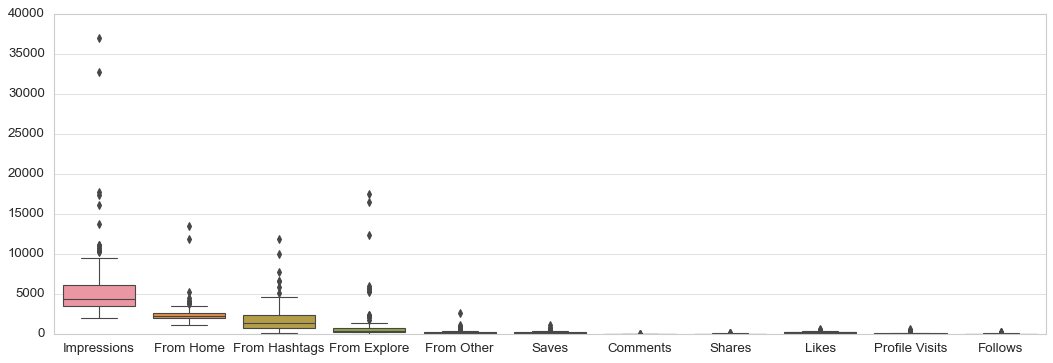

In [230]:
plt.figure(figsize=(16, 5))

sns.boxplot (data = numeric_data )
plt.show()

In [231]:
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((numeric_data < lower_bound) | (numeric_data > upper_bound)).any(axis=1)
clean_data = numeric_data[~outliers]

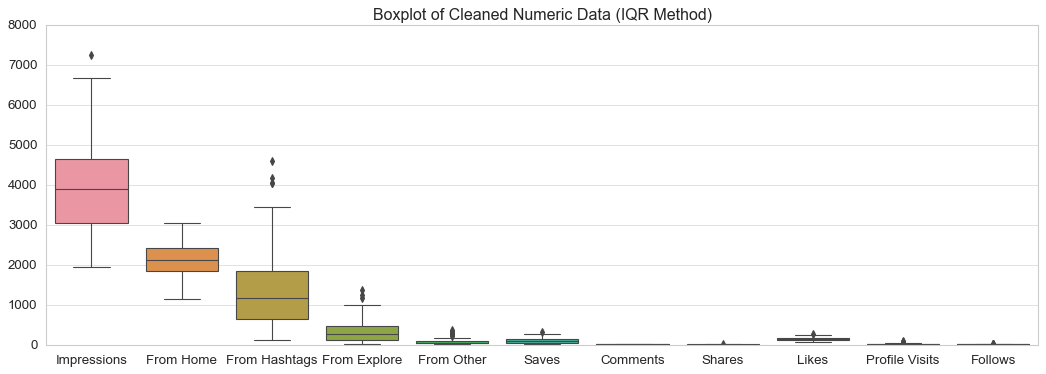

In [232]:
plt.figure(figsize=(16, 5))
sns.boxplot(data=clean_data)
plt.title('Boxplot of Cleaned Numeric Data (IQR Method)')

plt.show()

In [233]:
# Assuming x and y are defined from your dataset

x = np.array(df[['Likes', 'Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']])
y = np.array(df["Impressions"])


# Split data into training and test sets

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)


# Initialize the Linear Regression model

model = LinearRegression()


# Train the model

model.fit(xtrain, ytrain)

LinearRegression()

In [234]:
# Make predictions

y_pred_train = model.predict(xtrain)
y_pred_test = model.predict(xtest)


# Calculate variance of y_test

variance_y_test = np.var(ytest)

In [235]:
# Calculate MSE

mse_train = mean_squared_error(ytrain, y_pred_train)
mse_test = mean_squared_error(ytest, y_pred_test)


# Calculate normalized MSE

normalized_mse_train = mse_train / variance_y_test
normalized_mse_test = mse_test / variance_y_test


# Calculate R2 score

r2_train = r2_score(ytrain, y_pred_train)
r2_test = r2_score(ytest, y_pred_test)


print(f"Normalized Train MSE: {normalized_mse_train:.2f}")
print(f"Normalized Test MSE: {normalized_mse_test:.2f}")
print(f"Train R2: {r2_train:.2f}")
print(f"Test R2: {r2_test:.2f}")

Normalized Train MSE: 0.06
Normalized Test MSE: 0.12
Train R2: 0.88
Test R2: 0.88


In [236]:
# Define features for prediction

features_to_predict = np.array([[224, 194, 7, 14, 48, 10]])


# Predict impressions using the trained model

predicted_impressions = model.predict(features_to_predict)


print(f"Predicted Impressions: {predicted_impressions[0]:.2f}")

Predicted Impressions: 6216.52


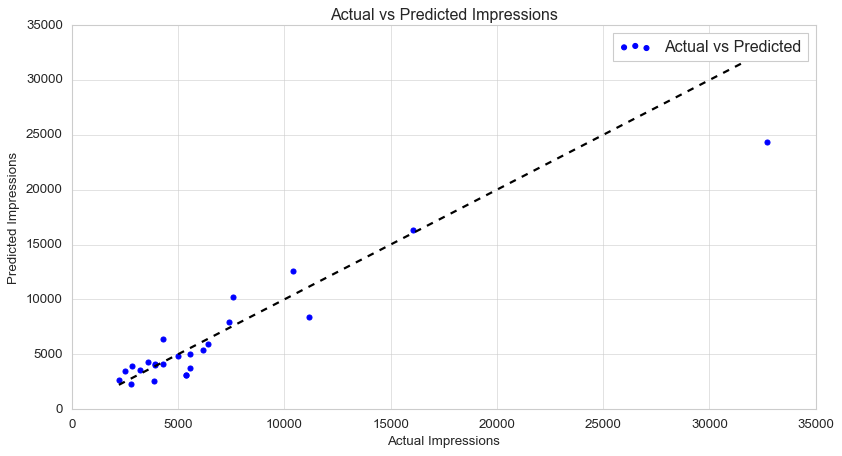

In [237]:
plt.figure(figsize=(12, 6))


# Plotting actual vs predicted

plt.scatter(ytest, y_pred_test, color='blue', label='Actual vs Predicted')
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=2)


plt.xlabel('Actual Impressions')
plt.ylabel('Predicted Impressions')
plt.title('Actual vs Predicted Impressions')


plt.legend()
plt.show()